# cell 1 - Sentiment Analysis
Load sentiment results and explore distributions & bank comparisons.


# Cell 2 — Imports + settings

In [3]:
# Cell 2: Imports & display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.dpi"] = 120


# Cell 3 — Load data

In [5]:
# Cell 3: Load sentiment CSV (adjust path if needed)
sentiment_path = "../data/sentiment/sentiment_results.csv"
df = pd.read_csv(sentiment_path)

# Quick sanity checks
print("Rows:", len(df))
display(df.head())
df.info()


Rows: 1463


,review_id,review_text,rating,review_date,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_score,sentiment_label
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29,BOA,Bank of Abyssinia,Yasin Alemu,0,2,Google Play,0.0000,neutral
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,BOA,Bank of Abyssinia,Wariyo Dida,0,9,Google Play,0.4927,positive
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,BOA,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play,0.0000,neutral
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,BOA,Bank of Abyssinia,Tsegay ab,0,5,Google Play,0.4926,positive
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,BOA,Bank of Abyssinia,Yohanis Fikadu,0,8,Google Play,0.4404,positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        1463 non-null   object 
 1   review_text      1463 non-null   object 
 2   rating           1463 non-null   int64  
 3   review_date      1463 non-null   object 
 4   bank_code        1463 non-null   object 
 5   bank_name        1463 non-null   object 
 6   user_name        1463 non-null   object 
 7   thumbs_up        1463 non-null   int64  
 8   text_length      1463 non-null   int64  
 9   source           1463 non-null   object 
 10  sentiment_score  1463 non-null   float64
 11  sentiment_label  1463 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 137.3+ KB


# Cell 4 — Ensure date and numeric types

In [6]:
# Cell 4: Fix dtypes (common issues)
if "review_date" in df.columns:
    df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")
# Ensure numeric score column exists (rename if different)
# We'll try to locate a numeric sentiment score column
possible_score_cols = [c for c in df.columns if "score" in c.lower() or "sentiment" in c.lower()]
print("Candidate score columns:", possible_score_cols)
# pick first candidate
score_col = possible_score_cols[0] if possible_score_cols else None
if score_col is None:
    raise ValueError("No sentiment score column found. Rename your sentiment score column (e.g., 'sentiment_score').")
df[score_col] = pd.to_numeric(df[score_col], errors="coerce")
df = df.dropna(subset=[score_col])


Candidate score columns: ['sentiment_score', 'sentiment_label']


# Cell 5 — Global sentiment distribution (hist + KDE)

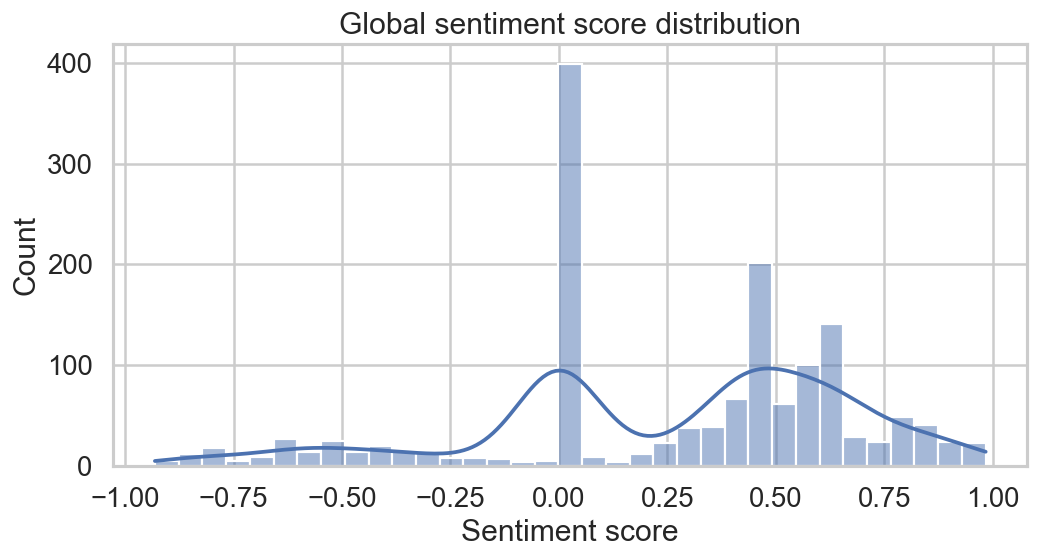

In [7]:
# Cell 5: Global distribution (histogram + KDE)
plt.figure(figsize=(9,5))
sns.histplot(df[score_col], kde=True, bins=35)
plt.title("Global sentiment score distribution")
plt.xlabel("Sentiment score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Cell 6 — Sentiment label counts (if label column exists)

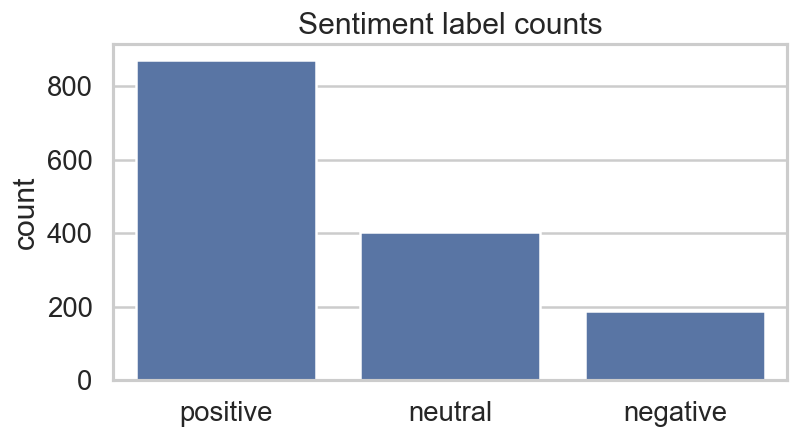

In [8]:
# Cell 6: Sentiment labels (optional)
label_col = None
for c in df.columns:
    if c.lower() in ("sentiment_label", "label"):
        label_col = c
        break

if label_col:
    plt.figure(figsize=(7,4))
    order = df[label_col].value_counts().index
    sns.countplot(x=label_col, data=df, order=order)
    plt.title("Sentiment label counts")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No discrete sentiment label column found — skipping label plot.")


# Cell 7 — Sentiment by bank (violin + swarm)

d:\10acadamyWeek2 project\Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\10acadamyWeek2 project\Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\10acadamyWeek2 project\Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\10acadamyWeek2 project\Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.0% of the points cannot 

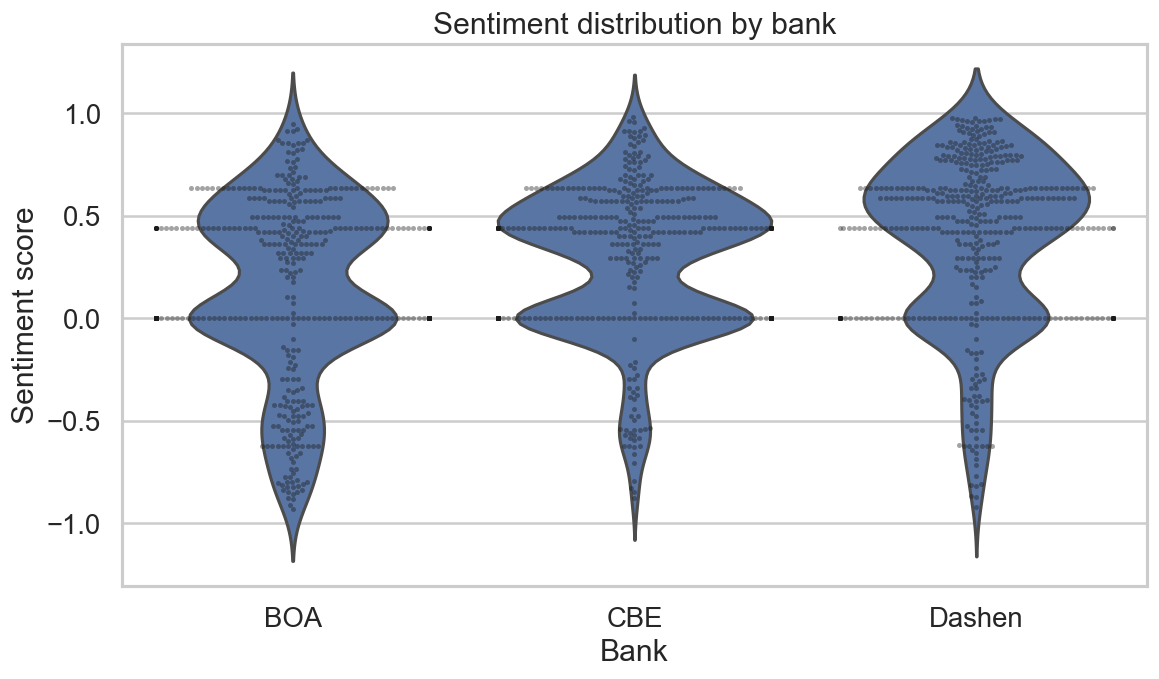

In [9]:
# Cell 7: Sentiment per bank (violin + swarm)
bank_col = "bank_code" if "bank_code" in df.columns else "bank"
plt.figure(figsize=(10,6))
sns.violinplot(x=bank_col, y=score_col, data=df, inner=None)
sns.swarmplot(x=bank_col, y=score_col, data=df, color="k", alpha=0.4, size=3)
plt.title("Sentiment distribution by bank")
plt.xlabel("Bank")
plt.ylabel("Sentiment score")
plt.tight_layout()
plt.show()
